In [ ]:
# This is a data clean and preprocessing notebook for delivery app data

In [160]:
# load raw data
location = 'C:/Users/bscot/OneDrive/Documents/DoorDash/DoorDash2'
hist = pd.read_csv(os.path.join(location, 'historical_data.csv'))
pred = pd.read_csv(os.path.join(location, 'predict_data.csv'))

# check raw data sets
print("Size of the dataset (row, col): ", hist.shape)
print("Data types of the dataset (row, col): ", hist.dtypes)
print("Size of the dataset (row, col): ", pred.shape)
print("Data types of the dataset (row, col): ", pred.dtypes)

Size of the dataset (row, col):  (197428, 16)
Data types of the dataset (row, col):  market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object
Size 

In [142]:
# select numeric columns
hist_numeric = hist.select_dtypes(include=[np.number])
hist_numeric_cols = hist_numeric.columns.values
print(hist_numeric_cols)
pred_numeric = pred.select_dtypes(include=[np.number])
pred_numeric_cols = pred_numeric.columns.values
print(pred_numeric_cols)

# select non numeric columns
hist_nonnumeric = hist.select_dtypes(exclude=[np.number])
hist_nonnumeric_cols = hist_nonnumeric.columns.values
print(hist_nonnumeric_cols)
pred_nonnumeric = pred.select_dtypes(exclude=[np.number])
pred_nonnumeric_cols = pred_nonnumeric.columns.values
print(pred_nonnumeric_cols)

['market_id' 'store_id' 'order_protocol' 'total_items' 'subtotal'
 'num_distinct_items' 'min_item_price' 'max_item_price'
 'total_onshift_dashers' 'total_busy_dashers' 'total_outstanding_orders'
 'estimated_order_place_duration'
 'estimated_store_to_consumer_driving_duration']
['market_id' 'store_id' 'order_protocol' 'total_items' 'subtotal'
 'num_distinct_items' 'min_item_price' 'max_item_price'
 'total_onshift_dashers' 'total_busy_dashers' 'total_outstanding_orders'
 'estimated_order_place_duration'
 'estimated_store_to_consumer_driving_duration' 'delivery_id']
['created_at' 'actual_delivery_time' 'store_primary_category']
['created_at' 'store_primary_category' 'platform']


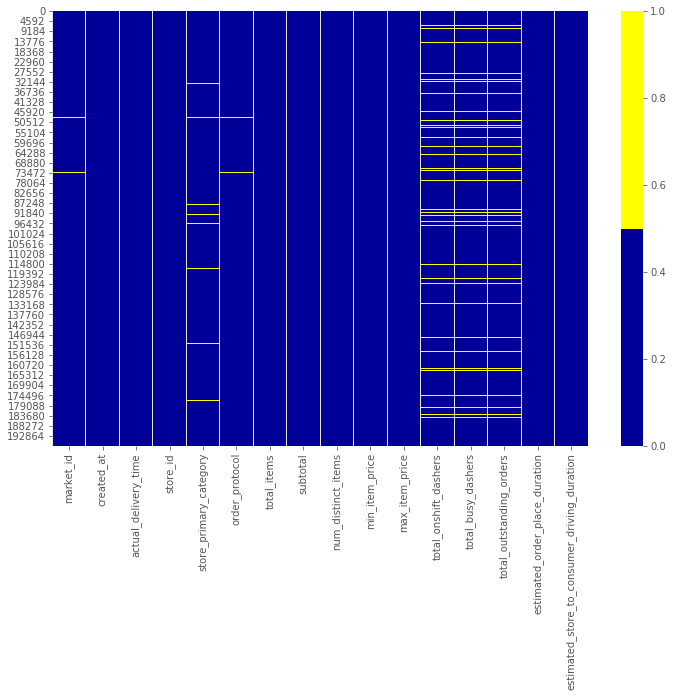

In [143]:
# Evaluate missing historical data 
cols = hist.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(hist[cols].isnull(), cmap=sns.color_palette(colours))

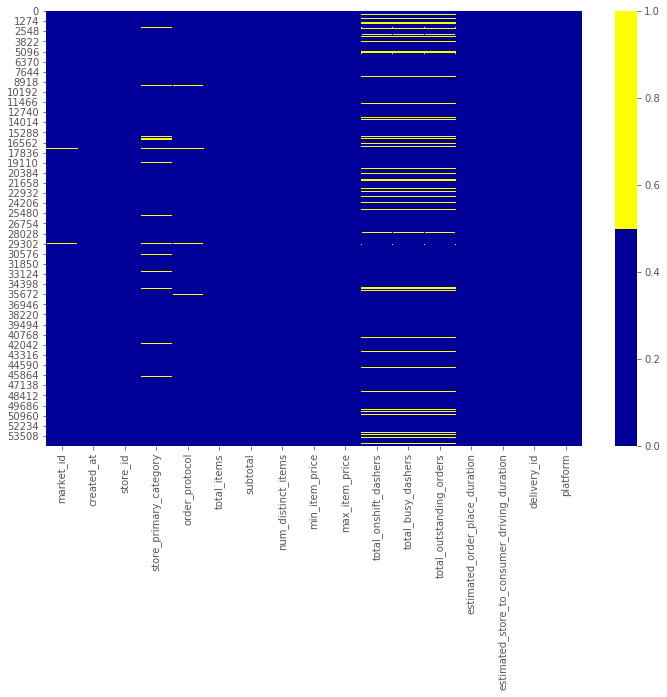

In [144]:
# Evaluate missing predict data 
cols = pred.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(pred[cols].isnull(), cmap=sns.color_palette(colours))

In [161]:
# Convert datetime features
hist['created_at'] = pd.to_datetime(hist['created_at'])
hist['actual_delivery_time'] = pd.to_datetime(hist['actual_delivery_time'])
#
hist['Day of Week'] = hist['created_at'].dt.weekday
hist['Hour of Day'] = hist['created_at'].dt.hour
hist['total delivery duration seconds'] = hist['actual_delivery_time']-hist['created_at']
hist['total delivery duration seconds'] = hist['total delivery duration seconds'].dt.seconds
#
hist.head(n=5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Day of Week,Hour of Day,total delivery duration seconds
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,4,22,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,1,21,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,3,20,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,1,21,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,6,2,2390.0


In [162]:
hist.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

In [170]:
# find remaining object cols for Label Encoder
# Dont forget to fix the NaNs if else LabelEncoder is a dick
onehot_find = hist.select_dtypes(include=[object]).replace(np.nan, 'none', regex=True)
onehot_find.head(10)

,store_primary_category
0,american
1,mexican
2,none
3,none
4,none
5,none
6,none
7,none
8,indian
9,none


In [171]:
# check original shape
onehot_find.shape

(197428, 1)

In [172]:
# view columns
onehot_find.columns

Index(['store_primary_category'], dtype='object')

In [173]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [176]:
# encode labels
le = preprocessing.LabelEncoder()
# use df.apply() to apply le.fit_transform to all columns
onehot_encode = onehot_find.apply(le.fit_transform)
onehot_encode.head()

,store_primary_category
0,4
1,47
2,51
3,51
4,51


In [177]:
# onehot object
enc = preprocessing.OneHotEncoder()
# fit
enc.fit(onehot_encode)
# transform
onehot_array = enc.transform(onehot_encode).toarray()
onehot_array.shape

(197428, 75)

In [179]:
onehot_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [180]:
hist.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'Day of Week',
       'Hour of Day', 'total delivery duration seconds'],
      dtype='object')

In [191]:
hist_selected = hist[['market_id', 
                      #'created_at', 
                      #'actual_delivery_time', 
                      'store_id',
                      #'store_primary_category', 
                      'order_protocol', 
                      'total_items', 
                      'subtotal',
                      'num_distinct_items', 
                      'min_item_price', 
                      'max_item_price',
                      'total_onshift_dashers', 
                      'total_busy_dashers',
                      'total_outstanding_orders', 
                      'estimated_order_place_duration',
                      'estimated_store_to_consumer_driving_duration', 
                      'Day of Week',
                      'Hour of Day', 
                      'total delivery duration seconds']]
onehot_df = pd.DataFrame(onehot_array)

#hist_selected.shape
# Place the DataFrames side by side
hist_impute = pd.concat([hist_selected, onehot_df], axis=1)
hist_impute.shape

(197428, 91)

In [195]:
# compare % missing to predictin data
for col in pred.columns:
    pct_missing = np.mean(pred[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

market_id - 0.0%
created_at - 0.0%
store_id - 0.0%
store_primary_category - 2.0%
order_protocol - 1.0%
total_items - 0.0%
subtotal - 0.0%
num_distinct_items - 0.0%
min_item_price - 0.0%
max_item_price - 0.0%
total_onshift_dashers - 8.0%
total_busy_dashers - 8.0%
total_outstanding_orders - 8.0%
estimated_order_place_duration - 0.0%
estimated_store_to_consumer_driving_duration - 0.0%
delivery_id - 0.0%
platform - 0.0%


In [197]:
# drop NaNs to train imputer
hist_impute_allnumeric = hist_impute.dropna()
hist_impute_allnumeric.isna().sum()

market_id         0
store_id          0
order_protocol    0
total_items       0
subtotal          0
                 ..
70                0
71                0
72                0
73                0
74                0
Length: 91, dtype: int64

In [200]:
# import
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# train imputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(hist_impute_allnumeric)
# apply to model
hist_imputed = np.round(imp.transform(hist_impute))

NameError: name 'hist_imputed_allnumeric' is not defined

In [205]:
# add cols check shape
hist_imputed = pd.DataFrame(hist_imputed, columns = hist_impute_allnumeric.columns)
hist_imputed.shape

(197428, 91)

In [206]:
# Check NaNs
for col in hist_imputed.columns:
    pct_missing = np.mean(hist_imputed[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

market_id - 0.0%
store_id - 0.0%
order_protocol - 0.0%
total_items - 0.0%
subtotal - 0.0%
num_distinct_items - 0.0%
min_item_price - 0.0%
max_item_price - 0.0%
total_onshift_dashers - 0.0%
total_busy_dashers - 0.0%
total_outstanding_orders - 0.0%
estimated_order_place_duration - 0.0%
estimated_store_to_consumer_driving_duration - 0.0%
Day of Week - 0.0%
Hour of Day - 0.0%
total delivery duration seconds - 0.0%
0 - 0.0%
1 - 0.0%
2 - 0.0%
3 - 0.0%
4 - 0.0%
5 - 0.0%
6 - 0.0%
7 - 0.0%
8 - 0.0%
9 - 0.0%
10 - 0.0%
11 - 0.0%
12 - 0.0%
13 - 0.0%
14 - 0.0%
15 - 0.0%
16 - 0.0%
17 - 0.0%
18 - 0.0%
19 - 0.0%
20 - 0.0%
21 - 0.0%
22 - 0.0%
23 - 0.0%
24 - 0.0%
25 - 0.0%
26 - 0.0%
27 - 0.0%
28 - 0.0%
29 - 0.0%
30 - 0.0%
31 - 0.0%
32 - 0.0%
33 - 0.0%
34 - 0.0%
35 - 0.0%
36 - 0.0%
37 - 0.0%
38 - 0.0%
39 - 0.0%
40 - 0.0%
41 - 0.0%
42 - 0.0%
43 - 0.0%
44 - 0.0%
45 - 0.0%
46 - 0.0%
47 - 0.0%
48 - 0.0%
49 - 0.0%
50 - 0.0%
51 - 0.0%
52 - 0.0%
53 - 0.0%
54 - 0.0%
55 - 0.0%
56 - 0.0%
57 - 0.0%
58 - 0.0%
59 - 0

In [223]:
hist_imputed.to_csv (r'C:/Users/bscot/OneDrive/Documents/DoorDash//DoorDash2/historical_imputed.csv', index = False, header=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text xticklabel objects>)

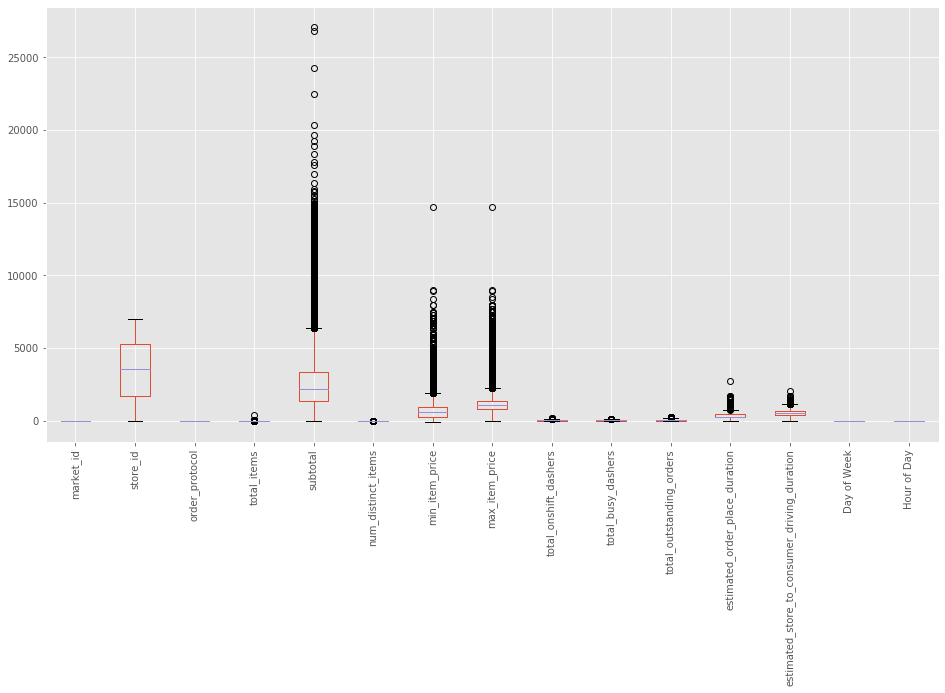

In [216]:
# get an idea of outliers from hist and predpred_box = pred.drop('delivery_id', axis=1)
hist_box = hist.drop('total delivery duration seconds', axis=1)
hist_box.plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

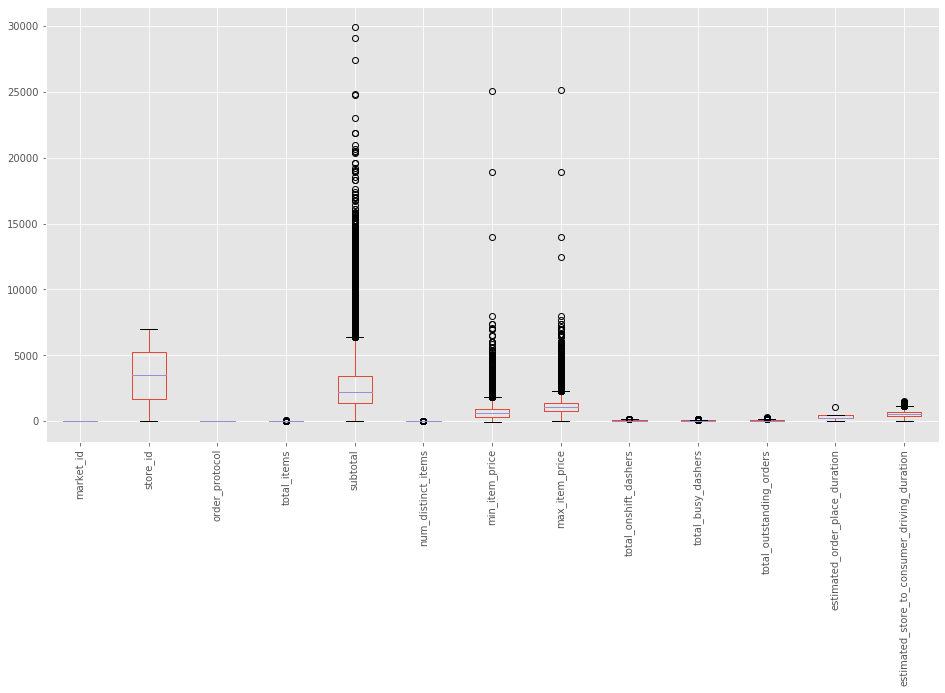

In [217]:
# get an idea of outliers from hist and pred
pred_box = pred.drop('delivery_id', axis=1)
pred_box.plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90]),
 <a list of 90 Text xticklabel objects>)

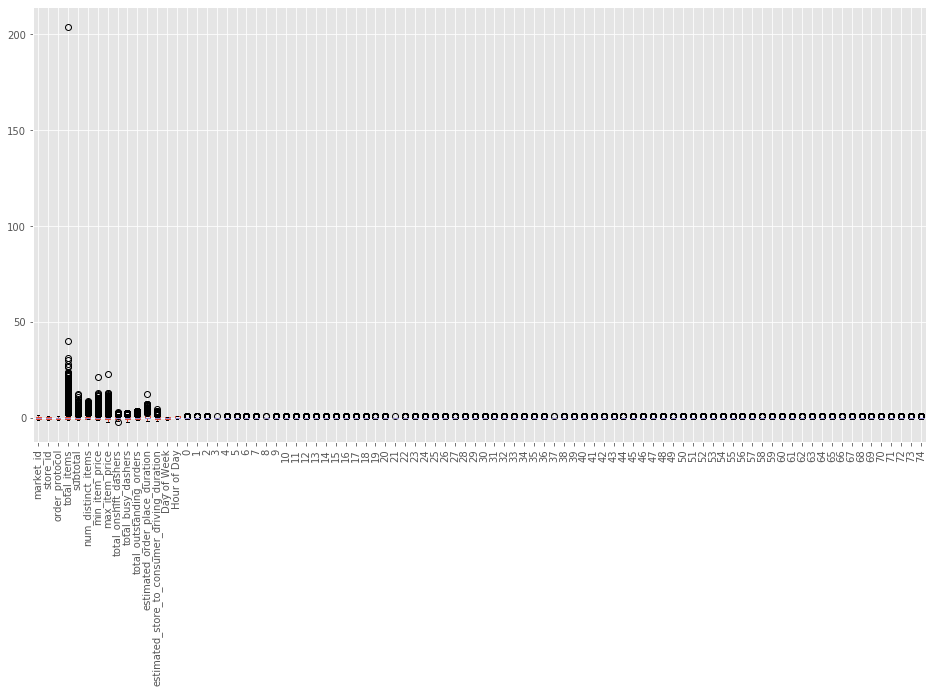

In [227]:
from sklearn.preprocessing import RobustScaler
hist_imputed_indy = hist_imputed.drop('total delivery duration seconds', axis=1)

transformer = RobustScaler().fit(hist_imputed_indy)
hist_imputed_scaled = transformer.transform(hist_imputed_indy)
hist_imputed_scaled = pd.DataFrame(hist_imputed_scaled, columns = hist_imputed_indy.columns)
# plots
hist_imputed_scaled.plot(kind='box', figsize=[16,8])
plt.xticks(rotation=90)

In [228]:
# export
unscaled_dep = pd.DataFrame(hist_imputed, columns = ['total delivery duration seconds'])
hist_imputed_scaled = pd.concat([hist_imputed_scaled ,unscaled_dep], axis=1)
hist_imputed_scaled.to_csv (r'C:/Users/bscot/OneDrive/Documents/DoorDash//DoorDash2/historical_imputed_scaled.csv', index = False, header=True)